<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025_3_ava/blob/main/FICCD_Claudomiro_ativ_3_1_Multiplicacao_matrizes_Redes_neurais_Raimunda_Branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 3.1 - Multiplicação de matrizes e Redes neurais
](https://docs.google.com/presentation/d/16n7FEnWr8DN4M3kiq4wxyE1pcu1urpQ90ZhuFyBsHYY/edit?usp=sharing)**

**Belém, 23 de junho de 2025.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Carrega os dados e particiona
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Normalização

# Criação da RN com PyTorch
import torch
import torch.nn.functional as F

#####**A)** *Implemente uma rede neural totalmente conectada com **duas camadas ocultas** e **uma camada de saída**, utilizando PyTorch. Cada camada oculta deve ser representada por uma **matriz 4×4**, e a camada de saída por uma **matriz 4×1**. Utilize a função de ativação **softplus** entre as camadas.*
*A rede deve ser treinada com o **conjunto de dados Iris**, utilizando apenas os atributos **sepal** e **petal length** como entradas, e apenas duas classes: **Setosa** e **Versicolor**.*
1. *Normalize os dados de entrada.*
2. *Use partição simples da base.*
3. *Inicialize três matrizes de pesos conforme explicado em sala.*
4. *Realize a propagação direta (forward pass) usando apenas torch.matmul e torch.nn.functional.softplus*
4. *Utilize o erro quadrático médio com função de perda e SDG como otimizador.*
6. *Compare os resultados com [ch02.ipynb](https://colab.research.google.com/drive/1ONSEFePhUsXewX4ccHEvTj0O4AA7aEcO?usp=sharing)*

Época 100, Loss: 0.0806
Época 200, Loss: 0.0571
Época 300, Loss: 0.0506
Época 400, Loss: 0.0481
Época 500, Loss: 0.0469
Época 600, Loss: 0.0460
Época 700, Loss: 0.0454
Época 800, Loss: 0.0448
Época 900, Loss: 0.0443
Época 1000, Loss: 0.0439
Acurácia do conjunto de teste: 90.00%


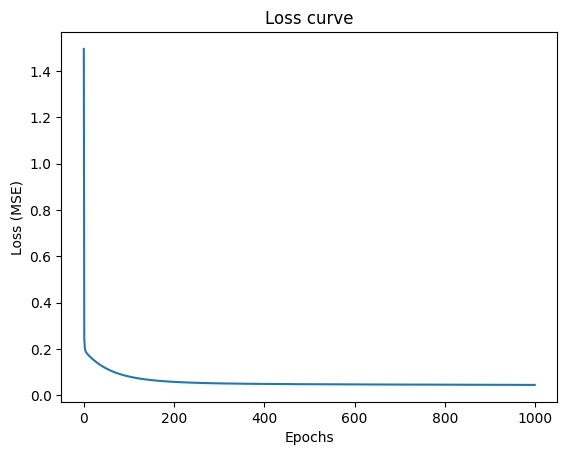

In [2]:
# Carregar o conjunto de dados Iris
iris = load_iris()
# print(iris)

# Entradas: features sepal length (0) e petal length (2)
X = iris.data[:, [0, 2]]
y = iris.target # classes

# Apenas duas classes Setosa (0) e Versicolor (1)
classes = y < 2
X = X[classes]
y = y[classes]

# 1. Normalize os dados de entrada (Min-Max).
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# print(X_normalized)

# 2. Use partição simples da base.
X_train, X_test, y_train, y_test = train_test_split(
  X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Converter arrays para tensores do PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# 3. Inicialize três matrizes de pesos conforme explicado em sala.
# - Duas camadas ocultas e uma camada de saída.
# - Cada camada oculta deve ser representada por uma matriz 4×4, e a camada de saída por uma matriz 4×1.
torch.manual_seed(42)

# Pesos
peso1 = torch.randn((2, 4), requires_grad=True)  # entrada -> 1ª oculta
peso2 = torch.randn((4, 4), requires_grad=True)  # 1ª oculta -> 2ª oculta
peso3 = torch.randn((4, 1), requires_grad=True)  # 2ª oculta -> saída

# Biases
bias1 = torch.randn((1, 4), requires_grad=True)  # P/ 1ª oculta
bias2 = torch.randn((1, 4), requires_grad=True)  # P/ 2ª oculta
bias3 = torch.randn((1, 1), requires_grad=True)  # P/ saída

# 4. Realize a propagação direta (forward pass) usando apenas torch.matmul e torch.nn.functional.softplus.
def forward(X):
  # Saída para a 1ª camada oculta com a função de ativação softplus
  out_camada1 = F.softplus(torch.matmul(X, peso1) + bias1)
  # Propragação para a 2ª camada oculta com a função de ativação softplus
  out_camada2 = F.softplus(torch.matmul(out_camada1, peso2) + bias2)
  # Saída final com ativação softplus
  output = F.softplus(torch.matmul(out_camada2, peso3) + bias3)
  return output

# 5. Utilize o erro quadrático médio (MSELoss) com função de perda e SDG como otimizador.
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD([peso1, peso2, peso3, bias1, bias2, bias3], lr=0.01)

# Treinamento da RN
losses = []
epochs = 1000

for epoch in range(epochs):
  y_pred = forward(X_train) # forward pass

  loss = loss_fn(y_pred, y_train) # função de perda

  optimizer.zero_grad() # zara os gradientes da iteração anterior

  loss.backward() # backpropagation

  optimizer.step() # atualiza o valor de cada peso

  losses.append(loss.item()) # armazena a perda

  # Exibe as perda a cada 10 épocas
  if (epoch + 1) % 100 == 0:
    print(f'Época {epoch+1}, Loss: {loss.item():.4f}')

# Calcular a acuracy
y_pred_test = forward(X_test)
y_pred_labels = (y_pred_test > 0.5).float()
accuracy = (y_pred_labels == y_test).float().mean()

print(f'Acurácia do conjunto de teste: {accuracy.item() * 100:.2f}%')

# Plotar a curva da perda
plt.plot(losses)
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

6 Compare os resultados com ch02.ipynb:

**Modelo:**

* ch02.ipynb: Perceptron e Adaline (1 camada, linear)

* Código: RN com 2 camadas ocultas + 1 camada de saída, não linear

**Bibliotecas:**

* ch02.ipynb: NumPy

* Código: PyTorch

**Pré-processamento:**

* ch02.ipynb: Não normaliza os dados

* Código: Normalização dos dados com MinMaxScaler

**Divisão dos Dados:**

* ch02.ipynb: Seleciona manualamente as classes

* Código: Usa train_test_split

**Função de Ativação:**

* ch02.ipynb: step_function

* Código: Softplus para todas as camadas

**Otimização:**

* ch02.ipynb: Regra do perceptron, calcula manualmente os pesos

* Código: SGD

**Função de Perda:**

* ch02.ipynb: Calcula manualmente a perda, SSE para o Adaline

* Código: Minimiza o erro quadrático médio, MSELoss

**Treinamento**

* ch02.ipynb: Sem backpropagation, cálculo manual dos gradientes

* Código: Backpropagation

**Hiperparâmetros**

* ch02.ipynb: Taxa aprendizado: 0.1 e 10 épocas

* Código: Taxa aprendizado: 0.01 e 2000 épocas
___

**Conclusão:**

O código do ch02.ipynb é bastante didático, permitindo entendimento dos cálculos de forward, perda e atualização dos pesos, mas não é adaptável para redes maiores e mais complexas. Já o código usando PyTorch automatiza o backpropagation e a atualização dos pesos, oferecendo maior eficiência nos problemas reais. No entanto, o uso de PyTorch "esconde" parte dos cálculos importantes e oculta as camadas, dificultando o entendimento da teoria de redes neurais.


#####**B)** *Neste exercício, você continuará utilizando a mesma arquitetura de rede neural e configuração do conjunto de dados do Problema 1:*

* *Duas características de entrada: comprimento da sépala e comprimento da pétala;*

* *Duas classes de saída: setosa e versicolor;*

* *Duas camadas ocultas. Cada camada oculta deve ser representada por uma **matriz 4×4**, e a camada de saída por uma **matriz 4×1**. Utilize a função de ativação **softplus** entre as camadas;*

* *Função de perda: MSELoss.*

*Seu objetivo é treinar a rede utilizando mini-batches, em vez de alimentar a rede com todo o conjunto de dados de uma vez (full batch):*

*Divida o conjunto de dados em 4 lotes (batches).*

*Treine a rede com as operações necessárias incluindo backward() e step() para atualizar os pesos.*




Época 100, Loss: 0.0728
Época 200, Loss: 0.0429
Época 300, Loss: 0.0360
Época 400, Loss: 0.0327
Época 500, Loss: 0.0566
Época 600, Loss: 0.0289
Época 700, Loss: 0.0398
Época 800, Loss: 0.0347
Época 900, Loss: 0.0472
Época 1000, Loss: 0.0291
Acurácia do conjunto de teste: 100.00%


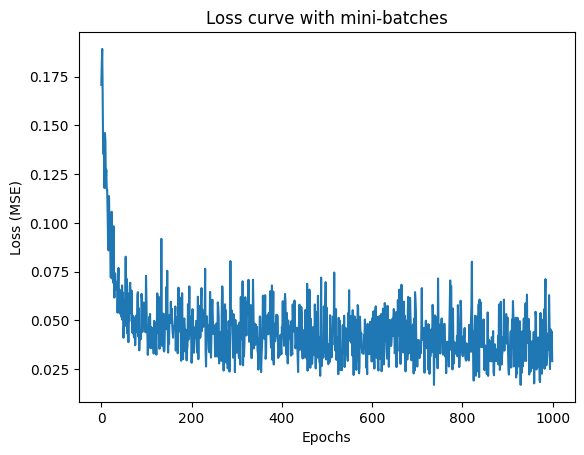

In [3]:
# Carregar o conjunto de dados Iris
iris = load_iris()
# print(iris)

# Entradas: features sepal length (0) e petal length (2)
X = iris.data[:, [0, 2]]
y = iris.target # classes

# Apenas duas classes Setosa (0) e Versicolor (1)
classes = y < 2
X = X[classes]
y = y[classes]

# 1. Normalize os dados de entrada (Min-Max).
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# print(X_normalized)

# 2. Use partição simples da base.
X_train, X_test, y_train, y_test = train_test_split(
  X_normalized, y, test_size=0.2, random_state=42, stratify=y)

# Converter arrays para tensores do PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# 3. Inicialize três matrizes de pesos conforme explicado em sala.
# - Duas camadas ocultas e uma camada de saída.
# - Cada camada oculta deve ser representada por uma matriz 4×4, e a camada de saída por uma matriz 4×1.
torch.manual_seed(42)

# Pesos
peso1 = torch.randn((2, 4), requires_grad=True)  # entrada -> 1ª oculta
peso2 = torch.randn((4, 4), requires_grad=True)  # 1ª oculta -> 2ª oculta
peso3 = torch.randn((4, 1), requires_grad=True)  # 2ª oculta -> saída

# Biases
bias1 = torch.randn((1, 4), requires_grad=True)  # P/ 1ª oculta
bias2 = torch.randn((1, 4), requires_grad=True)  # P/ 2ª oculta
bias3 = torch.randn((1, 1), requires_grad=True)  # P/ saída

# 4. Realize a propagação direta (forward pass) usando apenas torch.matmul e torch.nn.functional.softplus.
def forward(X):
  # Saída para a 1ª camada oculta com a função de ativação softplus
  out_camada1 = F.softplus(torch.matmul(X, peso1) + bias1)
  # Propragação para a 2ª camada oculta com a função de ativação softplus
  out_camada2 = F.softplus(torch.matmul(out_camada1, peso2) + bias2)
  # Saída final com ativação softplus
  output = F.softplus(torch.matmul(out_camada2, peso3) + bias3)
  return output

# 5. Utilize o erro quadrático médio (MSELoss) com função de perda e SDG como otimizador.
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD([peso1, peso2, peso3, bias1, bias2, bias3], lr=0.01)

# 6. Divida o conjunto de dados em 4 lotes (batches).
batch_size = int(len(X_train) / 4)

# Treinamento da RN
losses = []
epochs = 1000

for epoch in range(epochs):
  # Misturar os dados a cada época
  indices = torch.randperm(X_train.size(0))
  X_train_shuffled = X_train[indices]
  y_train_shuffled = y_train[indices]

  for i in range(0, X_train.size(0), batch_size):
    X_batch = X_train_shuffled[i:i + batch_size]
    y_batch = y_train_shuffled[i:i + batch_size]

    y_pred = forward(X_batch) # forward pass

    loss = loss_fn(y_pred, y_batch) # função de perda

    optimizer.zero_grad() # zara os gradientes da iteração anterior

    loss.backward() # backpropagation

    optimizer.step() # atualiza o valor de cada peso

  losses.append(loss.item()) # armazena a perda

  # Exibe as perda a cada 100 épocas
  if (epoch + 1) % 100 == 0:
    print(f'Época {epoch+1}, Loss: {loss.item():.4f}')

# Calcular a acuracy
y_pred_test = forward(X_test)
y_pred_labels = (y_pred_test > 0.5).float()
accuracy = (y_pred_labels == y_test).float().mean()

print(f'Acurácia do conjunto de teste: {accuracy.item() * 100:.2f}%')

# Plotar a curva da perda
plt.plot(losses)
plt.title('Loss curve with mini-batches')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

**Análise:**
* Em cada época, os dados são misturados (torch.randperm), fazendo com que os mini-batches sejam diferentes a cada iteração.
*Não se usa mais o conjunto de dados todo paa atualizar os pesos.
* Em cada época os pesos são atualizados 4x em cada mini-batch.
* O gráfico mostra uma curva bem menos suave que no método de full batch e com oscilações, mas ainda assim é um gráfico descrecente como o primeiro.

**Conclusão:**
* Utilizar mini-batches torna o código mais eficiente quando se usa conjunto de dados grande;
* Os ruídos nos gradientes ajudam a não cair nos mínimos locais;
* Suavização da descida do gradiente;
* Como o processamento ocorre em lotes menores, há redução no uso da memória e acelera o treinamento da base;
* Permitem otimizações na GPU, pois processam operações em lote de forma mais eficiente do que com amostras uma a uma.